# Round 2


### Dealing with the data


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn as sns
sns.set()

In [3]:
# df.columns

In [4]:

def dataframe(df):
    df.shape
    cols = []
    for column in df.columns:
        cols.append(column.lower())
    df.columns = cols
    df = df.drop('unnamed: 0',axis=1)
    df.dropna(inplace=True) # We are throwing away 5000 rows that are empty
    df['effective to date'] = pd.to_datetime(df['effective to date'])
    df['months'] = df['effective to date'].dt.month
    return df


df = dataframe(pd.read_csv('marketing_customer_analysis.csv'))

### Show DataFrame info.

In [5]:
df.columns

Index(['customer', 'state', 'customer lifetime value', 'response', 'coverage',
       'education', 'effective to date', 'employmentstatus', 'gender',
       'income', 'location code', 'marital status', 'monthly premium auto',
       'months since last claim', 'months since policy inception',
       'number of open complaints', 'number of policies', 'policy type',
       'policy', 'renew offer type', 'sales channel', 'total claim amount',
       'vehicle class', 'vehicle size', 'vehicle type', 'months'],
      dtype='object')

In [6]:
df.head()

,customer,state,customer lifetime value,response,coverage,education,effective to date,employmentstatus,gender,income,...,number of policies,policy type,policy,renew offer type,sales channel,total claim amount,vehicle class,vehicle size,vehicle type,months
2,LZ68649,Washington,14947.917300,No,Basic,Bachelor,2011-02-10,Employed,M,22139,...,2,Personal Auto,Personal L3,Offer3,Call Center,480.000000,SUV,Medsize,A,2
3,XL78013,Oregon,22332.439460,Yes,Extended,College,2011-01-11,Employed,M,49078,...,2,Corporate Auto,Corporate L3,Offer2,Branch,484.013411,Four-Door Car,Medsize,A,1
10,HG93801,Arizona,5154.764074,No,Extended,High School or Below,2011-01-02,Employed,M,82730,...,1,Corporate Auto,Corporate L3,Offer2,Branch,442.521087,SUV,Large,A,1
13,KR82385,California,5454.587929,No,Basic,Master,2011-01-26,Employed,M,66334,...,4,Personal Auto,Personal L3,Offer4,Call Center,331.200000,Two-Door Car,Medsize,A,1
16,FH51383,California,5326.677654,No,Basic,High School or Below,2011-02-07,Employed,F,76717,...,6,Personal Auto,Personal L3,Offer4,Call Center,300.528579,Two-Door Car,Large,A,2


### Describe DataFrame.

In [7]:
df.dtypes

customer                                 object
state                                    object
customer lifetime value                 float64
response                                 object
coverage                                 object
education                                object
effective to date                datetime64[ns]
employmentstatus                         object
gender                                   object
income                                    int64
location code                            object
marital status                           object
monthly premium auto                      int64
months since last claim                 float64
months since policy inception             int64
number of open complaints               float64
number of policies                        int64
policy type                              object
policy                                   object
renew offer type                         object
sales channel                           

In [8]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
customer lifetime value,4543.0,8033.714059,6959.529443,1904.000852,4039.089902,5846.520588,8936.596938,83325.381190
income,4543.0,37453.033238,30257.399536,0.000000,0.000000,34455.000000,61560.000000,99961.000000
monthly premium auto,4543.0,93.773278,35.093661,61.000000,69.000000,83.000000,110.000000,298.000000
months since last claim,4543.0,15.111820,10.157925,0.000000,6.000000,14.000000,23.000000,35.000000
months since policy inception,4543.0,48.153863,28.146904,0.000000,24.000000,47.000000,72.000000,99.000000
number of open complaints,4543.0,0.386309,0.907553,0.000000,0.000000,0.000000,0.000000,5.000000
number of policies,4543.0,2.980189,2.390362,1.000000,1.000000,2.000000,4.000000,9.000000
total claim amount,4543.0,436.477525,295.026990,0.099007,265.686145,384.000000,552.000000,2893.239678
months,4543.0,1.469734,0.499138,1.000000,1.000000,1.000000,2.000000,2.000000


In [9]:
df['response'].value_counts(ascending=True)

Yes     641
No     3902
Name: response, dtype: int64

In [10]:
df['response'].values
df['response'].value_counts()
df['response'].shape

(4543,)

# Round 3

### Show a plot of the total number of responses.

(<AxesSubplot:>,
 No     3902
 Yes     641
 Name: response, dtype: int64)

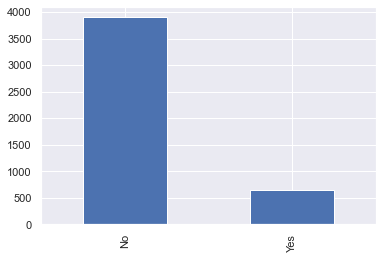

In [11]:
df['response'].value_counts().plot(kind='bar'), df['response'].value_counts()

### Show a plot of the response rate by the sales channel.

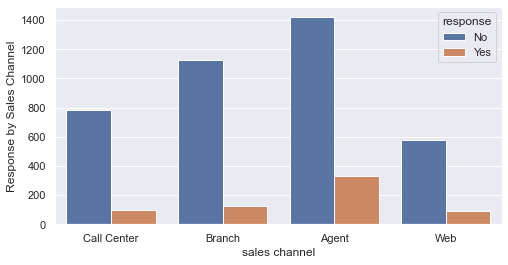

In [12]:
plt.figure(figsize=(8,4))
sns.countplot(x='sales channel', hue='response', data=df)
plt.ylabel('Response by Sales Channel')
plt.show()

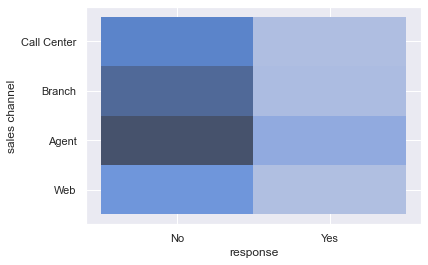

In [13]:
# sns.barplot(x="response", y="sales channel", data=df)
sns.histplot(binwidth=2, x="response", y="sales channel", data=df, stat="count", multiple="stack")

plt.show()

### Show a plot of the response rate by the total claim amount.


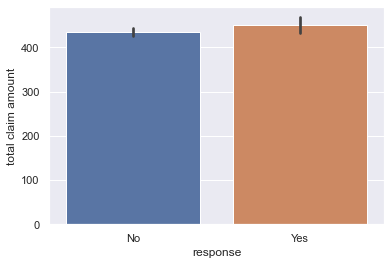

In [14]:
# sns.histplot(binwidth=2, x='response', y="total claim amount", data=df, stat="count", multiple="stack")
# plt.show()
sns.barplot(x="response", y="total claim amount", data=df)
plt.show()

In [15]:
# plt.figure(figsize=(8,4))
# sns.countplot(x='total claim amount', hue='response', data=df)
# plt.ylabel('Response by total claim amount')
# plt.show()

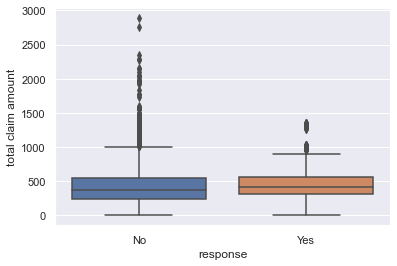

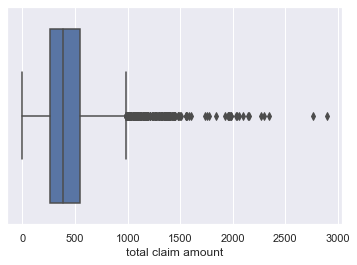

In [16]:
sns.boxplot(data=df,x="response", y="total claim amount")
plt.show()

sns.boxplot(data = df, x= "total claim amount")
plt.show()

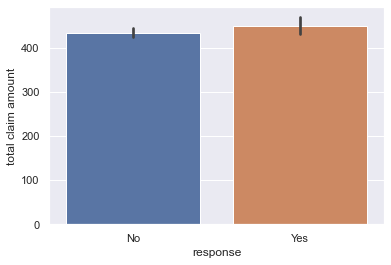

In [17]:
sns.barplot(x="response", y="total claim amount", data=df)
plt.show()

### Show a plot of the response rate by income.



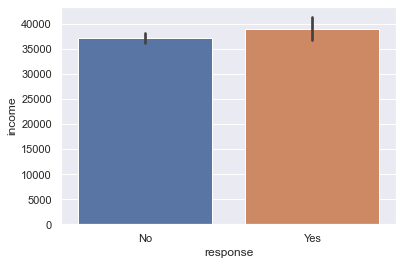

In [18]:
sns.barplot(x="response", y="income", data=df)
plt.show()

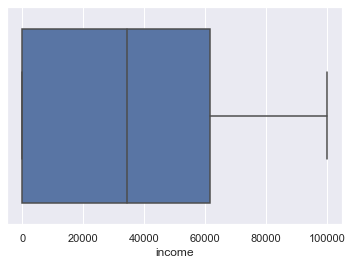

In [19]:
sns.boxplot(data=df, x='income')
plt.show()

In [20]:
# Not worth this one
# plt.figure(figsize=(8,4))
# sns.countplot(x='income', hue='response', data=df)
# plt.ylabel('Response by Income')
# plt.show()

# Round 4



In [21]:
X_num = df.select_dtypes(include = np.number)
X_cat = df.select_dtypes(include = object)

In [22]:
X_num.dtypes

customer lifetime value          float64
income                             int64
monthly premium auto               int64
months since last claim          float64
months since policy inception      int64
number of open complaints        float64
number of policies                 int64
total claim amount               float64
months                             int64
dtype: object

In [23]:
X_cat.dtypes

customer            object
state               object
response            object
coverage            object
education           object
employmentstatus    object
gender              object
location code       object
marital status      object
policy type         object
policy              object
renew offer type    object
sales channel       object
vehicle class       object
vehicle size        object
vehicle type        object
dtype: object

In [24]:
len(X_num.dtypes)/3

3.0

In [25]:
# sns.pairplot(X_num)
# plt.show()

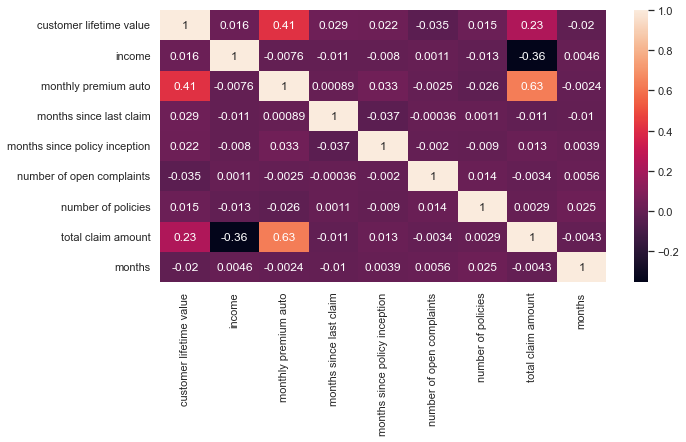

In [26]:
plt.figure(figsize=(10,5))
correlations_matrix = X_num.corr()
sns.heatmap(correlations_matrix, annot=True)
plt.show()

In [27]:
X_num.corr()

,customer lifetime value,income,monthly premium auto,months since last claim,months since policy inception,number of open complaints,number of policies,total claim amount,months
customer lifetime value,1.000000,0.015914,0.413739,0.029199,0.022465,-0.034924,0.015397,0.228579,-0.020217
income,0.015914,1.000000,-0.007594,-0.010556,-0.007987,0.001149,-0.013199,-0.355311,0.004593
monthly premium auto,0.413739,-0.007594,1.000000,0.000890,0.033422,-0.002469,-0.025578,0.630894,-0.002390
months since last claim,0.029199,-0.010556,0.000890,1.000000,-0.036879,-0.000364,0.001089,-0.011449,-0.010319
months since policy inception,0.022465,-0.007987,0.033422,-0.036879,1.000000,-0.001965,-0.009029,0.012610,0.003928
number of open complaints,-0.034924,0.001149,-0.002469,-0.000364,-0.001965,1.000000,0.014388,-0.003433,0.005646
number of policies,0.015397,-0.013199,-0.025578,0.001089,-0.009029,0.014388,1.000000,0.002864,0.025147
total claim amount,0.228579,-0.355311,0.630894,-0.011449,0.012610,-0.003433,0.002864,1.000000,-0.004340
months,-0.020217,0.004593,-0.002390,-0.010319,0.003928,0.005646,0.025147,-0.004340,1.000000


### Now we will try to check the normality of the numerical variables visually

In [28]:
# Function to remove outliers
def rm_outliers(df):
    iqr = np.percentile(df,75) - np.percentile(df,25)
    upper_limit1 = np.percentile(df,75) + 1.5*iqr
    lower_limit1 = np.percentile(df,25) - 1.5*iqr
    df0 = df[(df>lower_limit1) & (df<upper_limit1)].copy()
    sns.displot(df0,kde=True)        
    return plt.show()

In [29]:
X_num.columns

Index(['customer lifetime value', 'income', 'monthly premium auto',
       'months since last claim', 'months since policy inception',
       'number of open complaints', 'number of policies', 'total claim amount',
       'months'],
      dtype='object')

In [30]:
# fig, ax = plt.subplots()
# for i in X_num.columns:
#     plt.hist(X_num[i])
#     plt.show

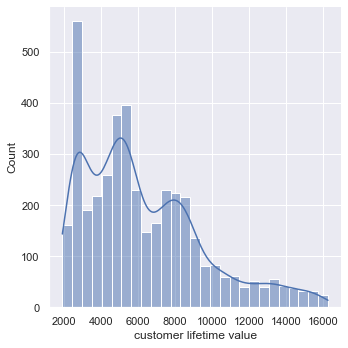

In [31]:
rm_outliers(df['customer lifetime value'])

### For the numerical variables, check the multicollinearity between the features.

In [32]:
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score

In [33]:
df.head()

,customer,state,customer lifetime value,response,coverage,education,effective to date,employmentstatus,gender,income,...,number of policies,policy type,policy,renew offer type,sales channel,total claim amount,vehicle class,vehicle size,vehicle type,months
2,LZ68649,Washington,14947.917300,No,Basic,Bachelor,2011-02-10,Employed,M,22139,...,2,Personal Auto,Personal L3,Offer3,Call Center,480.000000,SUV,Medsize,A,2
3,XL78013,Oregon,22332.439460,Yes,Extended,College,2011-01-11,Employed,M,49078,...,2,Corporate Auto,Corporate L3,Offer2,Branch,484.013411,Four-Door Car,Medsize,A,1
10,HG93801,Arizona,5154.764074,No,Extended,High School or Below,2011-01-02,Employed,M,82730,...,1,Corporate Auto,Corporate L3,Offer2,Branch,442.521087,SUV,Large,A,1
13,KR82385,California,5454.587929,No,Basic,Master,2011-01-26,Employed,M,66334,...,4,Personal Auto,Personal L3,Offer4,Call Center,331.200000,Two-Door Car,Medsize,A,1
16,FH51383,California,5326.677654,No,Basic,High School or Below,2011-02-07,Employed,F,76717,...,6,Personal Auto,Personal L3,Offer4,Call Center,300.528579,Two-Door Car,Large,A,2


In [45]:
df.columns

Index(['customer', 'state', 'customer lifetime value', 'response', 'coverage',
       'education', 'effective to date', 'employmentstatus', 'gender',
       'income', 'location code', 'marital status', 'monthly premium auto',
       'months since last claim', 'months since policy inception',
       'number of open complaints', 'number of policies', 'policy type',
       'policy', 'renew offer type', 'sales channel', 'total claim amount',
       'vehicle class', 'vehicle size', 'vehicle type', 'months'],
      dtype='object')

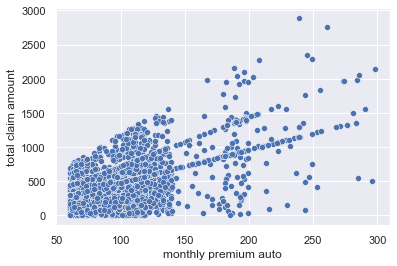

In [47]:
sns.scatterplot(x='monthly premium auto',y='total claim amount',data=df)
plt.show()
# df.columns

In [35]:
df['total claim amount'].corr(df['monthly premium auto'])

0.6308941629398925

In [58]:
y = df['total claim amount']
# X = df[['monthly premium auto']]
Xnum_ = df.drop(['total claim amount'], axis=1)
X_num = X.select_dtypes(include = np.number)
X_cat = X.select_dtypes(include = object)

In [60]:
X_num.head(3)

,customer lifetime value,income,monthly premium auto,months since last claim,months since policy inception,number of open complaints,number of policies,months
2,14947.917300,22139,100,34.0,31,0.0,2,2
3,22332.439460,49078,97,10.0,3,0.0,2,1
10,5154.764074,82730,127,13.0,31,0.0,1,1


In [61]:
type(X_num)

pandas.core.frame.DataFrame

In [50]:
lm = linear_model.LinearRegression()

In [62]:
%%time
# we now "fit" (a.k.a. "train") the model in our data
# linear regression picks the line (i.e. the intercept and the gradient) that best "fits" our data
# we will get to the meaning of "fitting the data" in a second

lm.fit(X_num,y)
print("b0 = ", lm.intercept_)
print("b1 = ", lm.coef_) # coefficients is an array because later we will see we can have more than one dimension for our gradient

b0 =  78.07786825818755
b1 =  [-1.31811979e-03 -3.41249941e-03  5.39609855e+00 -4.43410102e-01
 -1.19099656e-01 -8.99075518e-01  1.87024865e+00 -1.36274420e+00]
CPU times: total: 0 ns
Wall time: 3.99 ms


## Not possible to print because there are several dimensions

In [ ]:
#let's visualize this result
# regression_line = lm.intercept_ + lm.coef_[0]*df['monthly premium auto']
# plt.plot(df['monthly premium auto'], regression_line, c = 'orange')
# sns.scatterplot(x='monthly premium auto',y='total claim amount',data=df)
# plt.show()

In [66]:
# lm.predict([[10],[20],[35],[55]])
lm2 = linear_model.LinearRegression()
lm2.fit(X_num,y)
print(lm2.score(X_num,y))
y_pred = lm2.predict(X_num)
print(mean_squared_error(y_pred,y))

0.5222902089253081
41571.14939543274


In [ ]:
# df.describe().T

# Round 5

### X-y split and Normalize (numerical)

In [ ]:
from sklearn.preprocessing import MinMaxScaler # do not use the function Normalise() - it does something entirely different
from sklearn.preprocessing import StandardScaler
def normalizar(dataframe):
    y = dataframe['total claim amount']
    X = dataframe.drop(['total claim amount'], axis=1)
    X_num = X.select_dtypes(include = np.number)
    X_cat = X.select_dtypes(include = object)

    transformer = MinMaxScaler().fit(X_num)
    x_normalized = transformer.transform(X_num)
    print(x_normalized.shape)
    x_normalized
    df = pd.DataFrame(x_normalized, columns=X_num.columns)
    return df
df_Norm = normalizar(df)

In [ ]:
sns.boxplot(data=df_Norm, x='customer lifetime value')
plt.show()


In [ ]:
sns.boxplot(data=df_Norm, x='income')
plt.show()

In [ ]:
sns.boxplot(data=df_Norm, x='monthly premium auto')
plt.show()